In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("mydata.csv")
data.head()

,Name,Age,Income
0,A,27,70000
1,B,29,90000
2,C,29,61000
3,D,28,60000
4,E,42,150000


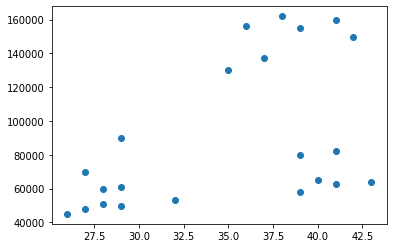

In [4]:
plt.scatter(data['Age'],data['Income'])

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
y_predicted = km.fit_predict(data[['Age','Income']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [8]:
data['cluster'] = y_predicted
data.head()

,Name,Age,Income,cluster
0,A,27,70000,0
1,B,29,90000,0
2,C,29,61000,2
3,D,28,60000,2
4,E,42,150000,1


No handles with labels found to put in legend.


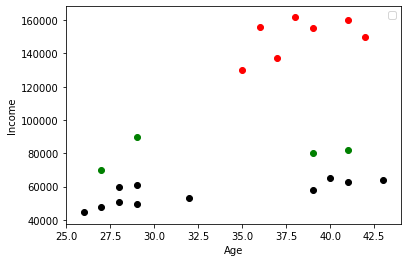

In [9]:
ck1 = data[data.cluster==0]
ck2 = data[data.cluster==1]
ck3 = data[data.cluster==2]

plt.scatter(ck1.Age,ck1['Income'],color='green')
plt.scatter(ck2.Age,ck2['Income'],color='red')
plt.scatter(ck3.Age,ck3['Income'],color='black')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [13]:
scaler = MinMaxScaler()
scaler.fit(data[['Income']])
data['Income'] = scaler.transform(data[['Income']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])
data

,Name,Age,Income,cluster
0,A,0.058824,0.213675,0
1,B,0.176471,0.384615,0
2,C,0.176471,0.136752,2
3,D,0.117647,0.128205,2
4,E,0.941176,0.897436,1
5,F,0.764706,0.940171,1
6,G,0.882353,0.982906,1
7,H,0.705882,1.000000,1
8,I,0.588235,0.948718,1
9,J,0.529412,0.726496,1


In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age','Income']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [15]:
data['cluster'] = y_predicted
data

,Name,Age,Income,cluster
0,A,0.058824,0.213675,1
1,B,0.176471,0.384615,1
2,C,0.176471,0.136752,1
3,D,0.117647,0.128205,1
4,E,0.941176,0.897436,2
5,F,0.764706,0.940171,2
6,G,0.882353,0.982906,2
7,H,0.705882,1.000000,2
8,I,0.588235,0.948718,2
9,J,0.529412,0.726496,2


In [17]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

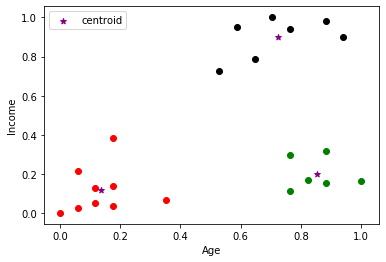

In [18]:
ck1 = data[data.cluster==0]
ck2 = data[data.cluster==1]
ck3 = data[data.cluster==2]

plt.scatter(ck1.Age,ck1['Income'],color='green')
plt.scatter(ck2.Age,ck2['Income'],color='red')
plt.scatter(ck3.Age,ck3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [19]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income']])
    sse.append(km.inertia_)

In [20]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.2664030124668415,
 0.22020960864009392,
 0.16858512236029755,
 0.14258711825476086,
 0.10497488680620905]

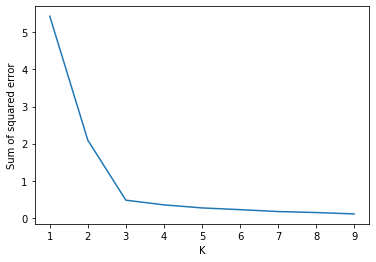

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)